In [1]:
from goatools import obo_parser
from goatools.anno import genetogo_reader
from goatools.go_enrichment import GOEnrichmentStudy
import pandas as pd

In [ ]:
# dex
res = pd.read_csv('/mnt/x/analysis/res_BA.csv', names=['transcript_id', "baseMean","log2FoldChange","lfcSE","stat","pvalue","padj"], skiprows=1)

# select only significant genes
res = res[res['padj'] < 0.05]

# first column is transcript_id
res

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id
1015,XM_027387088.2,29.206301,-18.749329,3.214111,-5.833442,1.712912e-08,1.671298e-05,NaN
1270,XM_027387432.2,81.702130,-20.206657,3.219511,-6.276312,1.240346e-09,1.543976e-06,NaN
1730,XM_027388101.2,9.534256,-29.998659,6.177317,-4.856260,1.597965e-06,9.235289e-04,100758940.0
2617,XM_027389512.2,62.651158,-16.624120,3.838839,-4.330507,2.571105e-05,1.006608e-02,NaN
3700,XM_027391164.2,2839.218021,-5.740208,0.914688,-6.275593,1.095694e-07,8.720106e-05,NaN
...,...,...,...,...,...,...,...,...
54327,XR_004771430.1,29.626425,6.663494,1.490602,4.470336,7.264045e-05,2.574070e-02,NaN
54395,XR_004771502.1,23.456469,18.800729,3.590664,5.236004,3.745114e-07,2.560761e-04,NaN
54862,XR_004772025.1,67.741210,-18.524782,2.554160,-7.252788,3.423068e-12,6.924153e-09,NaN
55019,XR_004772192.1,171.847858,9.650615,1.836153,5.255888,1.234190e-06,7.584335e-04,NaN


In [ ]:
# from goatools.base import download_ncbi_associations
# # fin -> Filename of input file (file to be read)
# fin_gene2go = download_ncbi_associations()

$ get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
FTP RETR ftp.ncbi.nlm.nih.gov gene/DATA gene2go.gz -> gene2go.gz
$ gunzip gene2go.gz


In [ ]:
# from goatools.anno.genetogo_reader import Gene2GoReader
# objanno_hsa = Gene2GoReader(fin_gene2go, taxids=[10029])

HMS:0:05:46.722038  83,249 annotations, 19,519 genes,  7,442 GOs, 1 taxids READ: gene2go 


In [ ]:
# ns2assc = objanno_hsa.get_ns2assc()

In [13]:
res = pd.read_csv('/mnt/x/analysis/results_dex/dex_combined_df.csv')

# drop unneeded columns
res = res.drop(columns=['Unnamed: 0'])

# rename gene_id to transcript_id
res = res.rename(columns={'gene_id': 'transcript_id'})

In [14]:
res

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,timepoint
0,NM_001243976.1,4245.686653,0.196113,0.026962,7.273810,1.000000,1.0,1
1,NM_001243977.1,19021.783223,-0.235875,0.027394,-8.610582,1.000000,1.0,1
2,NM_001243978.1,20606.777055,-0.127580,0.020996,-6.076452,1.000000,1.0,1
3,NM_001243979.1,30428.954143,-0.068637,0.021033,-3.263334,1.000000,1.0,1
4,NM_001243980.1,2097.731384,-0.084298,0.038456,-2.192069,1.000000,1.0,1
...,...,...,...,...,...,...,...,...
443507,XR_004772669.1,173.161224,0.450135,0.148567,3.029837,0.999893,1.0,8
443508,XR_004772670.1,67.072993,0.391419,0.233639,1.675313,0.995403,1.0,8
443509,XR_004772671.1,0.361662,0.000000,8.329115,0.000000,1.000000,NaN,8
443510,XR_004772672.1,0.501833,0.664868,4.254820,0.156262,0.879182,NaN,8


In [2]:
import pickle
# open the pickle file in binary mode
with open('GO_mapping/ns2assc.pickle', 'rb') as f:
    # read pickle
    ns2assc = pickle.load(f)


In [16]:
# open /mnt/x/analysis/ref/CriGri-PICRH-1.gff
# extract association between gene_id and transcript

gff = pd.read_csv('/mnt/x/analysis/ref/CriGri-PICRH-1.gff', sep='\t', comment='#', header=None, names=['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
gff = gff[gff['type'] == 'mRNA']


In [17]:
# Dbxref=GeneID:100682526,Genbank:NM_001243977.1;Name=NM_001243977.1; -> this is the example of attributes, extract gene_id and genbank mapping
def extract_gene_id(attributes):
    for attr in attributes.split(';'):
        if 'GeneID' in attr:
            return attr.split(':')[1].split(',')[0]
    return None

def extract_genbank(attributes):
    for attr in attributes.split(';'):
        if 'Genbank' in attr:
            return attr.split('Genbank:')[1].split(';')[0]
    return None

def extract_name(attributes):
    for attr in attributes.split(';'):
        if 'Parent=gene-' in attr:
            return attr.split('Parent=gene-')[1].split(';')[0]
    return None

gff['gene_id'] = gff['attributes'].apply(extract_gene_id)
gff['transcript_id'] = gff['attributes'].apply(extract_genbank)
gff['gene_name'] = gff['attributes'].map(extract_name)

gff_mRNA = gff[['gene_id', 'transcript_id', 'gene_name']]

In [18]:
res

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,timepoint
0,NM_001243976.1,4245.686653,0.196113,0.026962,7.273810,1.000000,1.0,1
1,NM_001243977.1,19021.783223,-0.235875,0.027394,-8.610582,1.000000,1.0,1
2,NM_001243978.1,20606.777055,-0.127580,0.020996,-6.076452,1.000000,1.0,1
3,NM_001243979.1,30428.954143,-0.068637,0.021033,-3.263334,1.000000,1.0,1
4,NM_001243980.1,2097.731384,-0.084298,0.038456,-2.192069,1.000000,1.0,1
...,...,...,...,...,...,...,...,...
443507,XR_004772669.1,173.161224,0.450135,0.148567,3.029837,0.999893,1.0,8
443508,XR_004772670.1,67.072993,0.391419,0.233639,1.675313,0.995403,1.0,8
443509,XR_004772671.1,0.361662,0.000000,8.329115,0.000000,1.000000,NaN,8
443510,XR_004772672.1,0.501833,0.664868,4.254820,0.156262,0.879182,NaN,8


In [19]:
# merge gff_mRNA with res
# res = pd.read_csv('/mnt/x/analysis/res_BA.csv', names=['transcript_id', "baseMean","log2FoldChange","lfcSE","stat","pvalue","padj"], skiprows=1)
resa = res.merge(gff_mRNA, left_on='transcript_id', right_on='transcript_id')
resa

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,timepoint,gene_id,gene_name
0,NM_001243976.1,4245.686653,0.196113,0.026962,7.273810,1.000000,1.0,1,100682525,Tp53
1,NM_001243977.1,19021.783223,-0.235875,0.027394,-8.610582,1.000000,1.0,1,100682526,Tuba1c
2,NM_001243978.1,20606.777055,-0.127580,0.020996,-6.076452,1.000000,1.0,1,100682527,Tuba1a
3,NM_001243979.1,30428.954143,-0.068637,0.021033,-3.263334,1.000000,1.0,1,100682528,Tuba1b
4,NM_001243980.1,2097.731384,-0.084298,0.038456,-2.192069,1.000000,1.0,1,100682529,Mgat1
...,...,...,...,...,...,...,...,...,...,...
373099,XM_035453945.1,0.019775,0.843463,8.329115,0.101267,0.919916,NaN,8,100769265,LOC100769265
373100,XM_035453946.1,1.237285,4.756626,2.926957,1.625110,0.124271,1.0,8,100768212,LOC100768212
373101,XM_035453947.1,0.020025,-1.080617,8.329115,-0.129740,0.897510,NaN,8,113837732,LOC113837732
373102,XM_035453948.1,0.040252,0.000000,8.329115,0.000000,1.000000,NaN,8,118239831,LOC118239831


In [27]:
goea_res

,GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_bonferroni,...,pop_n,goterm,id,item_id,namespace,parents,children,level,is_obsolete,alt_ids
0,GO:0003674,MF,e,molecular_function,"(1210, 1554)","(16294, 46638)",1.109672e-271,0,1210,3.472162e-268,...,46638,GO:0003674\tlevel-00\tdepth-00\tmolecular_func...,GO:0003674,GO:0003674,molecular_function,{},{GO:0044183\tlevel-01\tdepth-01\tprotein foldi...,0,False,{GO:0005554}
1,GO:0005488,MF,e,binding,"(863, 1554)","(10868, 46638)",5.847445e-171,1,863,1.829666e-167,...,46638,GO:0005488\tlevel-01\tdepth-01\tbinding [molec...,GO:0005488,GO:0005488,molecular_function,{GO:0003674\tlevel-00\tdepth-00\tmolecular_fun...,{GO:0016597\tlevel-02\tdepth-02\tamino acid bi...,1,False,{}
2,GO:0003824,MF,e,catalytic activity,"(453, 1554)","(5120, 46638)",3.640097e-89,1,453,1.138986e-85,...,46638,GO:0003824\tlevel-01\tdepth-01\tcatalytic acti...,GO:0003824,GO:0003824,molecular_function,{GO:0003674\tlevel-00\tdepth-00\tmolecular_fun...,{GO:0016787\tlevel-02\tdepth-02\thydrolase act...,1,False,{}
3,GO:0005515,MF,e,protein binding,"(464, 1554)","(5375, 46638)",5.045633e-88,2,464,1.578779e-84,...,46638,GO:0005515\tlevel-02\tdepth-02\tprotein bindin...,GO:0005515,GO:0005515,molecular_function,{GO:0005488\tlevel-01\tdepth-01\tbinding [mole...,{GO:0051021\tlevel-03\tdepth-03\tGDP-dissociat...,2,False,"{GO:0045308, GO:0001948}"
4,GO:0036094,MF,e,small molecule binding,"(330, 1554)","(3632, 46638)",4.030864e-65,2,330,1.261257e-61,...,46638,GO:0036094\tlevel-02\tdepth-02\tsmall molecule...,GO:0036094,GO:0036094,molecular_function,{GO:0005488\tlevel-01\tdepth-01\tbinding [mole...,{GO:0050825\tlevel-03\tdepth-03\tice binding [...,2,False,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,GO:0140097,MF,e,"catalytic activity, acting on DNA","(19, 1554)","(183, 46638)",1.309196e-05,3,19,4.096476e-02,...,46638,GO:0140097\tlevel-03\tdepth-03\tcatalytic acti...,GO:0140097,GO:0140097,molecular_function,{GO:0140640\tlevel-02\tdepth-02\tcatalytic act...,{GO:0004803\tlevel-04\tdepth-04\ttransposase a...,3,False,{}
100,GO:0008236,MF,e,serine-type peptidase activity,"(19, 1554)","(183, 46638)",1.309196e-05,4,19,4.096476e-02,...,46638,GO:0008236\tlevel-04\tdepth-04\tserine-type pe...,GO:0008236,GO:0008236,molecular_function,{GO:0008233\tlevel-03\tdepth-03\tpeptidase act...,{GO:0004252\tlevel-05\tdepth-05\tserine-type e...,4,False,{}
101,GO:0005507,MF,e,copper ion binding,"(8, 1554)","(35, 46638)",1.573316e-05,7,8,4.922905e-02,...,46638,GO:0005507\tlevel-07\tdepth-07\tcopper ion bin...,GO:0005507,GO:0005507,molecular_function,{GO:0046914\tlevel-06\tdepth-06\ttransition me...,{GO:1903135\tlevel-08\tdepth-08\tcupric ion bi...,7,False,{}
1196,GO:0004984,MF,p,olfactory receptor activity,"(2, 1554)","(1139, 46638)",1.736785e-14,4,2,5.434400e-11,...,46638,GO:0004984\tlevel-04\tdepth-04\tolfactory rece...,GO:0004984,GO:0004984,molecular_function,{GO:0004888\tlevel-03\tdepth-03\ttransmembrane...,{GO:0038022\tlevel-05\tdepth-05\tG protein-cou...,4,False,{}


In [28]:
go_obo = obo_parser.GODag("ref/go.obo")  # or go.obo

sig_GOs = []

for go_cat in ['CC', 'MF', 'BP']:
    for timepoint in resa['timepoint'].unique():
        res_tp = resa.loc[resa['timepoint'] == timepoint]
        res_selected = res_tp.loc[(resa['padj'] < 0.05)]
        
        goea = GOEnrichmentStudy(
            list(res_tp["gene_id"].astype(int)),  # Your list of genes
            ns2assc[go_cat],  # Your gene-to-GO mapping
            go_obo,  # The GO ontology
            pval_threshold=0.05,  # P-value cutoff
            correction_method="fdr_bh"  # FDR correction method (e.g., Benjamini-Hochberg)
        )
        
        goea_res = goea.run_study_nts(res_selected.loc[:, 'gene_id'].astype(int))
        # to dataframe
        goea_res = pd.DataFrame(goea_res)
        # filter only significant
        goea_res = goea_res.loc[goea_res['p_bonferroni'] < 0.05]
        goea_res['timepoint'] = timepoint
        goea_res['go_cat'] = go_cat
        sig_GOs.append(goea_res)

ref/go.obo: fmt(1.2) rel(2025-02-06) 43,597 Terms

Load  Ontology Enrichment Analysis ...
Propagating term counts up: is_a
 69% 32,383 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 142 IDs.
 71%     96 of    135 study items found in association
 95%    135 of    142 study items found in population(46638)
Calculating 1,200 uncorrected p-values using fisher_scipy_stats


1 GO IDs NOT FOUND IN ASSOCIATION: GO:0045261


   1,200 terms are associated with 15,016 of 46,638 population items
     161 terms are associated with     96 of    135 study items
  METHOD bonferroni:
       7 GO terms found significant (< 0.05=alpha) (  7 enriched +   0 purified): local bonferroni
      96 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
       7 GO terms found significant (< 0.05=alpha) (  7 enriched +   0 purified): local sidak
      96 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
       7 GO terms found significant (< 0.05=alpha) (  7 enriched +   0 purified): local holm
      96 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Load  Ontology Enrichment Analysis ...
Propagating term counts up: is_a


1 GO IDs NOT FOUND IN ASSOCIATION: GO:0045261


 69% 32,383 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 349 IDs.
 69%    227 of    327 study items found in association
 94%    327 of    349 study items found in population(46638)
Calculating 1,200 uncorrected p-values using fisher_scipy_stats
   1,200 terms are associated with 15,016 of 46,638 population items
     233 terms are associated with    227 of    327 study items
  METHOD bonferroni:
      10 GO terms found significant (< 0.05=alpha) ( 10 enriched +   0 purified): local bonferroni
     227 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      10 GO terms found significant (< 0.05=alpha) ( 10 enriched +   0 purified): local sidak
     227 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      10 GO terms found significant (< 0.05=alpha) ( 10 

1 GO IDs NOT FOUND IN ASSOCIATION: GO:0045261


   1,200 terms are associated with 15,016 of 46,638 population items
     245 terms are associated with    217 of    322 study items
  METHOD bonferroni:
      12 GO terms found significant (< 0.05=alpha) ( 12 enriched +   0 purified): local bonferroni
     217 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      12 GO terms found significant (< 0.05=alpha) ( 12 enriched +   0 purified): local sidak
     217 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      12 GO terms found significant (< 0.05=alpha) ( 12 enriched +   0 purified): local holm
     217 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Load  Ontology Enrichment Analysis ...
Propagating term counts up: is_a
 69% 32,383 of 46,638 population items found in associ

1 GO IDs NOT FOUND IN ASSOCIATION: GO:0045261


   1,200 terms are associated with 15,016 of 46,638 population items
     307 terms are associated with    347 of    491 study items
  METHOD bonferroni:
      18 GO terms found significant (< 0.05=alpha) ( 18 enriched +   0 purified): local bonferroni
     347 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      18 GO terms found significant (< 0.05=alpha) ( 18 enriched +   0 purified): local sidak
     347 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      18 GO terms found significant (< 0.05=alpha) ( 18 enriched +   0 purified): local holm
     347 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Load  Ontology Enrichment Analysis ...
Propagating term counts up: is_a
 69% 32,383 of 46,638 population items found in associ

1 GO IDs NOT FOUND IN ASSOCIATION: GO:0045261


   1,200 terms are associated with 15,016 of 46,638 population items
     363 terms are associated with    447 of    618 study items
  METHOD bonferroni:
      25 GO terms found significant (< 0.05=alpha) ( 25 enriched +   0 purified): local bonferroni
     447 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      25 GO terms found significant (< 0.05=alpha) ( 25 enriched +   0 purified): local sidak
     447 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      25 GO terms found significant (< 0.05=alpha) ( 25 enriched +   0 purified): local holm
     447 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Load  Ontology Enrichment Analysis ...
Propagating term counts up: is_a
 69% 32,383 of 46,638 population items found in associ

1 GO IDs NOT FOUND IN ASSOCIATION: GO:0045261


   1,200 terms are associated with 15,016 of 46,638 population items
     376 terms are associated with    529 of    745 study items
  METHOD bonferroni:
      30 GO terms found significant (< 0.05=alpha) ( 30 enriched +   0 purified): local bonferroni
     529 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      30 GO terms found significant (< 0.05=alpha) ( 30 enriched +   0 purified): local sidak
     529 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      30 GO terms found significant (< 0.05=alpha) ( 30 enriched +   0 purified): local holm
     529 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Load  Ontology Enrichment Analysis ...
Propagating term counts up: is_a


1 GO IDs NOT FOUND IN ASSOCIATION: GO:0045261


 69% 32,383 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 1858 IDs.
 69%  1,113 of  1,608 study items found in association
 87%  1,608 of  1,858 study items found in population(46638)
Calculating 1,200 uncorrected p-values using fisher_scipy_stats
   1,200 terms are associated with 15,016 of 46,638 population items
     530 terms are associated with  1,113 of  1,608 study items
  METHOD bonferroni:
      44 GO terms found significant (< 0.05=alpha) ( 44 enriched +   0 purified): local bonferroni
   1,113 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      44 GO terms found significant (< 0.05=alpha) ( 44 enriched +   0 purified): local sidak
   1,113 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      44 GO terms found significant (< 0.05=alpha) ( 44

1 GO IDs NOT FOUND IN ASSOCIATION: GO:0045261


 69% 32,383 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 1767 IDs.
 70%  1,085 of  1,554 study items found in association
 88%  1,554 of  1,767 study items found in population(46638)
Calculating 1,200 uncorrected p-values using fisher_scipy_stats
   1,200 terms are associated with 15,016 of 46,638 population items
     516 terms are associated with  1,085 of  1,554 study items
  METHOD bonferroni:
      47 GO terms found significant (< 0.05=alpha) ( 47 enriched +   0 purified): local bonferroni
   1,085 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      48 GO terms found significant (< 0.05=alpha) ( 48 enriched +   0 purified): local sidak
   1,085 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      48 GO terms found significant (< 0.05=alpha) ( 48

6 GO IDs NOT FOUND IN ASSOCIATION: GO:0003896 GO:0001055 GO:0002094 GO:0030374 GO:0001054 GO:0001056


 77% 35,836 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 142 IDs.
 83%    112 of    135 study items found in association
 95%    135 of    142 study items found in population(46638)
Calculating 3,129 uncorrected p-values using fisher_scipy_stats
   3,129 terms are associated with 16,294 of 46,638 population items
     259 terms are associated with    111 of    135 study items
  METHOD bonferroni:
      12 GO terms found significant (< 0.05=alpha) ( 12 enriched +   0 purified): local bonferroni
     111 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      12 GO terms found significant (< 0.05=alpha) ( 12 enriched +   0 purified): local sidak
     111 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      12 GO terms found significant (< 0.05=alpha) ( 12 

6 GO IDs NOT FOUND IN ASSOCIATION: GO:0003896 GO:0001055 GO:0002094 GO:0030374 GO:0001054 GO:0001056


 77% 35,836 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 349 IDs.
 80%    261 of    327 study items found in association
 94%    327 of    349 study items found in population(46638)
Calculating 3,129 uncorrected p-values using fisher_scipy_stats
   3,129 terms are associated with 16,294 of 46,638 population items
     491 terms are associated with    261 of    327 study items
  METHOD bonferroni:
      56 GO terms found significant (< 0.05=alpha) ( 56 enriched +   0 purified): local bonferroni
     261 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      56 GO terms found significant (< 0.05=alpha) ( 56 enriched +   0 purified): local sidak
     261 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      56 GO terms found significant (< 0.05=alpha) ( 56 

6 GO IDs NOT FOUND IN ASSOCIATION: GO:0003896 GO:0001055 GO:0002094 GO:0030374 GO:0001054 GO:0001056


 77% 35,836 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 345 IDs.
 82%    263 of    322 study items found in association
 93%    322 of    345 study items found in population(46638)
Calculating 3,129 uncorrected p-values using fisher_scipy_stats
   3,129 terms are associated with 16,294 of 46,638 population items
     488 terms are associated with    263 of    322 study items
  METHOD bonferroni:
      49 GO terms found significant (< 0.05=alpha) ( 49 enriched +   0 purified): local bonferroni
     263 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      49 GO terms found significant (< 0.05=alpha) ( 49 enriched +   0 purified): local sidak
     263 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      49 GO terms found significant (< 0.05=alpha) ( 49 

6 GO IDs NOT FOUND IN ASSOCIATION: GO:0003896 GO:0001055 GO:0002094 GO:0030374 GO:0001054 GO:0001056


 77% 35,836 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 540 IDs.
 78%    381 of    491 study items found in association
 91%    491 of    540 study items found in population(46638)
Calculating 3,129 uncorrected p-values using fisher_scipy_stats
   3,129 terms are associated with 16,294 of 46,638 population items
     606 terms are associated with    381 of    491 study items
  METHOD bonferroni:
      50 GO terms found significant (< 0.05=alpha) ( 49 enriched +   1 purified): local bonferroni
     381 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      50 GO terms found significant (< 0.05=alpha) ( 49 enriched +   1 purified): local sidak
     381 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      50 GO terms found significant (< 0.05=alpha) ( 49 

6 GO IDs NOT FOUND IN ASSOCIATION: GO:0003896 GO:0001055 GO:0002094 GO:0030374 GO:0001054 GO:0001056


 77% 35,836 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 676 IDs.
 79%    490 of    618 study items found in association
 91%    618 of    676 study items found in population(46638)
Calculating 3,129 uncorrected p-values using fisher_scipy_stats
   3,129 terms are associated with 16,294 of 46,638 population items
     690 terms are associated with    490 of    618 study items
  METHOD bonferroni:
      62 GO terms found significant (< 0.05=alpha) ( 61 enriched +   1 purified): local bonferroni
     490 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      62 GO terms found significant (< 0.05=alpha) ( 61 enriched +   1 purified): local sidak
     490 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      62 GO terms found significant (< 0.05=alpha) ( 61 

6 GO IDs NOT FOUND IN ASSOCIATION: GO:0003896 GO:0001055 GO:0002094 GO:0030374 GO:0001054 GO:0001056


 77% 35,836 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 849 IDs.
 79%    590 of    745 study items found in association
 88%    745 of    849 study items found in population(46638)
Calculating 3,129 uncorrected p-values using fisher_scipy_stats
   3,129 terms are associated with 16,294 of 46,638 population items
     759 terms are associated with    589 of    745 study items
  METHOD bonferroni:
      75 GO terms found significant (< 0.05=alpha) ( 73 enriched +   2 purified): local bonferroni
     589 study items associated with significant GO IDs (enriched)
       8 study items associated with significant GO IDs (purified)
  METHOD sidak:
      75 GO terms found significant (< 0.05=alpha) ( 73 enriched +   2 purified): local sidak
     589 study items associated with significant GO IDs (enriched)
       8 study items associated with significant GO IDs (purified)
  METHOD holm:
      75 GO terms found significant (< 0.05=alpha) ( 73 

6 GO IDs NOT FOUND IN ASSOCIATION: GO:0003896 GO:0001055 GO:0002094 GO:0030374 GO:0001054 GO:0001056


 77% 35,836 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 1858 IDs.
 77%  1,245 of  1,608 study items found in association
 87%  1,608 of  1,858 study items found in population(46638)
Calculating 3,129 uncorrected p-values using fisher_scipy_stats
   3,129 terms are associated with 16,294 of 46,638 population items
   1,201 terms are associated with  1,245 of  1,608 study items
  METHOD bonferroni:
     102 GO terms found significant (< 0.05=alpha) (100 enriched +   2 purified): local bonferroni
   1,245 study items associated with significant GO IDs (enriched)
      25 study items associated with significant GO IDs (purified)
  METHOD sidak:
     102 GO terms found significant (< 0.05=alpha) (100 enriched +   2 purified): local sidak
   1,245 study items associated with significant GO IDs (enriched)
      25 study items associated with significant GO IDs (purified)
  METHOD holm:
     102 GO terms found significant (< 0.05=alpha) (100

6 GO IDs NOT FOUND IN ASSOCIATION: GO:0003896 GO:0001055 GO:0002094 GO:0030374 GO:0001054 GO:0001056


 77% 35,836 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 1767 IDs.
 78%  1,211 of  1,554 study items found in association
 88%  1,554 of  1,767 study items found in population(46638)
Calculating 3,129 uncorrected p-values using fisher_scipy_stats
   3,129 terms are associated with 16,294 of 46,638 population items
   1,222 terms are associated with  1,210 of  1,554 study items
  METHOD bonferroni:
     104 GO terms found significant (< 0.05=alpha) (102 enriched +   2 purified): local bonferroni
   1,210 study items associated with significant GO IDs (enriched)
      27 study items associated with significant GO IDs (purified)
  METHOD sidak:
     104 GO terms found significant (< 0.05=alpha) (102 enriched +   2 purified): local sidak
   1,210 study items associated with significant GO IDs (enriched)
      27 study items associated with significant GO IDs (purified)
  METHOD holm:
     104 GO terms found significant (< 0.05=alpha) (102

21 GO IDs NOT FOUND IN ASSOCIATION: GO:0006268 GO:0042989 GO:0046177 GO:0044806 GO:0007253 GO:0042994 GO:0000717 GO:0097340 GO:0097202 GO:0043402 GO:0006978 GO:0051103 GO:0106035 GO:0006288 GO:0006880 GO:1903762 GO:0032508 GO:0071076 GO:0022417 GO:1901006 GO:0097428


 75% 34,771 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 142 IDs.
 80%    108 of    135 study items found in association
 95%    135 of    142 study items found in population(46638)
Calculating 6,662 uncorrected p-values using fisher_scipy_stats
   6,662 terms are associated with 15,872 of 46,638 population items
     626 terms are associated with    108 of    135 study items
  METHOD bonferroni:
      18 GO terms found significant (< 0.05=alpha) ( 18 enriched +   0 purified): local bonferroni
     108 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      18 GO terms found significant (< 0.05=alpha) ( 18 enriched +   0 purified): local sidak
     108 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      18 GO terms found significant (< 0.05=alpha) ( 18 

21 GO IDs NOT FOUND IN ASSOCIATION: GO:0006268 GO:0042989 GO:0046177 GO:0044806 GO:0007253 GO:0042994 GO:0000717 GO:0097340 GO:0097202 GO:0043402 GO:0006978 GO:0051103 GO:0106035 GO:0006288 GO:0006880 GO:1903762 GO:0032508 GO:0071076 GO:0022417 GO:1901006 GO:0097428


 75% 34,771 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 349 IDs.
 77%    252 of    327 study items found in association
 94%    327 of    349 study items found in population(46638)
Calculating 6,662 uncorrected p-values using fisher_scipy_stats
   6,662 terms are associated with 15,872 of 46,638 population items
   1,122 terms are associated with    252 of    327 study items
  METHOD bonferroni:
      34 GO terms found significant (< 0.05=alpha) ( 34 enriched +   0 purified): local bonferroni
     252 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      34 GO terms found significant (< 0.05=alpha) ( 34 enriched +   0 purified): local sidak
     252 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      34 GO terms found significant (< 0.05=alpha) ( 34 

21 GO IDs NOT FOUND IN ASSOCIATION: GO:0006268 GO:0042989 GO:0046177 GO:0044806 GO:0007253 GO:0042994 GO:0000717 GO:0097340 GO:0097202 GO:0043402 GO:0006978 GO:0051103 GO:0106035 GO:0006288 GO:0006880 GO:1903762 GO:0032508 GO:0071076 GO:0022417 GO:1901006 GO:0097428


up: is_a
 75% 34,771 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 345 IDs.
 72%    233 of    322 study items found in association
 93%    322 of    345 study items found in population(46638)
Calculating 6,662 uncorrected p-values using fisher_scipy_stats
   6,662 terms are associated with 15,872 of 46,638 population items
   1,225 terms are associated with    233 of    322 study items
  METHOD bonferroni:
      38 GO terms found significant (< 0.05=alpha) ( 38 enriched +   0 purified): local bonferroni
     233 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      39 GO terms found significant (< 0.05=alpha) ( 39 enriched +   0 purified): local sidak
     233 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      38 GO terms found significant (< 0.05=alp

21 GO IDs NOT FOUND IN ASSOCIATION: GO:0006268 GO:0042989 GO:0046177 GO:0044806 GO:0007253 GO:0042994 GO:0000717 GO:0097340 GO:0097202 GO:0043402 GO:0006978 GO:0051103 GO:0106035 GO:0006288 GO:0006880 GO:1903762 GO:0032508 GO:0071076 GO:0022417 GO:1901006 GO:0097428


 75% 34,771 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 540 IDs.
 74%    364 of    491 study items found in association
 91%    491 of    540 study items found in population(46638)
Calculating 6,662 uncorrected p-values using fisher_scipy_stats
   6,662 terms are associated with 15,872 of 46,638 population items
   1,366 terms are associated with    364 of    491 study items
  METHOD bonferroni:
      41 GO terms found significant (< 0.05=alpha) ( 41 enriched +   0 purified): local bonferroni
     364 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      41 GO terms found significant (< 0.05=alpha) ( 41 enriched +   0 purified): local sidak
     364 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      41 GO terms found significant (< 0.05=alpha) ( 41 

21 GO IDs NOT FOUND IN ASSOCIATION: GO:0006268 GO:0042989 GO:0046177 GO:0044806 GO:0007253 GO:0042994 GO:0000717 GO:0097340 GO:0097202 GO:0043402 GO:0006978 GO:0051103 GO:0106035 GO:0006288 GO:0006880 GO:1903762 GO:0032508 GO:0071076 GO:0022417 GO:1901006 GO:0097428


 75% 34,771 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 676 IDs.
 75%    466 of    618 study items found in association
 91%    618 of    676 study items found in population(46638)
Calculating 6,662 uncorrected p-values using fisher_scipy_stats
   6,662 terms are associated with 15,872 of 46,638 population items
   1,636 terms are associated with    466 of    618 study items
  METHOD bonferroni:
      74 GO terms found significant (< 0.05=alpha) ( 74 enriched +   0 purified): local bonferroni
     466 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      74 GO terms found significant (< 0.05=alpha) ( 74 enriched +   0 purified): local sidak
     466 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      74 GO terms found significant (< 0.05=alpha) ( 74 

21 GO IDs NOT FOUND IN ASSOCIATION: GO:0006268 GO:0042989 GO:0046177 GO:0044806 GO:0007253 GO:0042994 GO:0000717 GO:0097340 GO:0097202 GO:0043402 GO:0006978 GO:0051103 GO:0106035 GO:0006288 GO:0006880 GO:1903762 GO:0032508 GO:0071076 GO:0022417 GO:1901006 GO:0097428


 75% 34,771 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 849 IDs.
 76%    563 of    745 study items found in association
 88%    745 of    849 study items found in population(46638)
Calculating 6,662 uncorrected p-values using fisher_scipy_stats
   6,662 terms are associated with 15,872 of 46,638 population items
   1,863 terms are associated with    563 of    745 study items
  METHOD bonferroni:
      91 GO terms found significant (< 0.05=alpha) ( 91 enriched +   0 purified): local bonferroni
     563 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
      91 GO terms found significant (< 0.05=alpha) ( 91 enriched +   0 purified): local sidak
     563 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
      91 GO terms found significant (< 0.05=alpha) ( 91 

21 GO IDs NOT FOUND IN ASSOCIATION: GO:0006268 GO:0042989 GO:0046177 GO:0044806 GO:0007253 GO:0042994 GO:0000717 GO:0097340 GO:0097202 GO:0043402 GO:0006978 GO:0051103 GO:0106035 GO:0006288 GO:0006880 GO:1903762 GO:0032508 GO:0071076 GO:0022417 GO:1901006 GO:0097428


up: is_a
 75% 34,771 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 1858 IDs.
 73%  1,172 of  1,608 study items found in association
 87%  1,608 of  1,858 study items found in population(46638)
Calculating 6,662 uncorrected p-values using fisher_scipy_stats
   6,662 terms are associated with 15,872 of 46,638 population items
   2,805 terms are associated with  1,171 of  1,608 study items
  METHOD bonferroni:
     162 GO terms found significant (< 0.05=alpha) (162 enriched +   0 purified): local bonferroni
   1,171 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
     163 GO terms found significant (< 0.05=alpha) (163 enriched +   0 purified): local sidak
   1,171 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
     163 GO terms found significant (< 0.05=al

21 GO IDs NOT FOUND IN ASSOCIATION: GO:0006268 GO:0042989 GO:0046177 GO:0044806 GO:0007253 GO:0042994 GO:0000717 GO:0097340 GO:0097202 GO:0043402 GO:0006978 GO:0051103 GO:0106035 GO:0006288 GO:0006880 GO:1903762 GO:0032508 GO:0071076 GO:0022417 GO:1901006 GO:0097428


up: is_a
 75% 34,771 of 46,638 population items found in association

Runing  Ontology Analysis: current study set of 1767 IDs.
 74%  1,153 of  1,554 study items found in association
 88%  1,554 of  1,767 study items found in population(46638)
Calculating 6,662 uncorrected p-values using fisher_scipy_stats
   6,662 terms are associated with 15,872 of 46,638 population items
   2,773 terms are associated with  1,152 of  1,554 study items
  METHOD bonferroni:
     154 GO terms found significant (< 0.05=alpha) (154 enriched +   0 purified): local bonferroni
   1,152 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD sidak:
     154 GO terms found significant (< 0.05=alpha) (154 enriched +   0 purified): local sidak
   1,152 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD holm:
     154 GO terms found significant (< 0.05=al

In [30]:
pd.concat(sig_GOs).to_csv('results_dex/significant_GO.csv', index=False)


In [31]:
sig_GOs_df = pd.concat(sig_GOs)
sig_GOs_df

,GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_bonferroni,...,id,item_id,namespace,parents,children,level,is_obsolete,alt_ids,timepoint,go_cat
0,GO:0005575,CC,e,cellular_component,"(96, 135)","(15016, 46638)",2.214001e-20,0,96,2.656801e-17,...,GO:0005575,GO:0005575,cellular_component,{},{GO:0032991\tlevel-01\tdepth-01\tprotein-conta...,0,False,{GO:0008372},1,CC
1,GO:0110165,CC,e,cellular anatomical structure,"(83, 135)","(13468, 46638)",3.735353e-15,1,83,4.482423e-12,...,GO:0110165,GO:0110165,cellular_component,{GO:0005575\tlevel-00\tdepth-00\tcellular_comp...,{GO:0035748\tlevel-02\tdepth-02\tmyelin sheath...,1,False,{},1,CC
2,GO:0043226,CC,e,organelle,"(45, 135)","(5333, 46638)",1.378759e-11,2,45,1.654511e-08,...,GO:0043226,GO:0043226,cellular_component,{GO:0110165\tlevel-01\tdepth-01\tcellular anat...,{GO:0099572\tlevel-03\tdepth-03\tpostsynaptic ...,2,False,{},1,CC
3,GO:0043229,CC,e,intracellular organelle,"(42, 135)","(5165, 46638)",2.757611e-10,3,42,3.309133e-07,...,GO:0043229,GO:0043229,cellular_component,{GO:0043226\tlevel-02\tdepth-02\torganelle [ce...,{GO:0043232\tlevel-04\tdepth-04\tintracellular...,3,False,{},1,CC
4,GO:0043227,CC,e,membrane-bounded organelle,"(36, 135)","(4437, 46638)",8.400729e-09,3,36,1.008087e-05,...,GO:0043227,GO:0043227,cellular_component,{GO:0043226\tlevel-02\tdepth-02\torganelle [ce...,{GO:0031982\tlevel-04\tdepth-04\tvesicle [cell...,3,False,{},1,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,GO:0051276,BP,e,chromosome organization,"(16, 1554)","(127, 46638)",5.388588e-06,5,16,3.589877e-02,...,GO:0051276,GO:0051276,biological_process,{GO:0006996\tlevel-04\tdepth-04\torganelle org...,{GO:0032200\tlevel-06\tdepth-06\ttelomere orga...,5,False,"{GO:0006323, GO:0007001, GO:0051277}",8,BP
150,GO:0045597,BP,e,positive regulation of cell differentiation,"(12, 1554)","(74, 46638)",5.833296e-06,5,12,3.886142e-02,...,GO:0045597,GO:0045597,biological_process,{GO:0048522\tlevel-04\tdepth-04\tpositive regu...,{GO:0045600\tlevel-06\tdepth-06\tpositive regu...,5,False,{},8,BP
151,GO:0071526,BP,e,semaphorin-plexin signaling pathway,"(8, 1554)","(31, 46638)",5.936955e-06,6,8,3.955199e-02,...,GO:0071526,GO:0071526,biological_process,{GO:0007166\tlevel-03\tdepth-05\tcell surface ...,{GO:0071527\tlevel-05\tdepth-07\tsemaphorin-pl...,4,False,{},8,BP
152,GO:0120035,BP,e,regulation of plasma membrane bounded cell pro...,"(14, 1554)","(101, 46638)",6.720202e-06,6,14,4.476998e-02,...,GO:0120035,GO:0120035,biological_process,{GO:0031344\tlevel-05\tdepth-05\tregulation of...,{GO:1902950\tlevel-07\tdepth-07\tregulation of...,6,False,{},8,BP


In [32]:
sig_GOs_df.columns

Index(['GO', 'NS', 'enrichment', 'name', 'ratio_in_study', 'ratio_in_pop',
       'p_uncorrected', 'depth', 'study_count', 'p_bonferroni', 'p_sidak',
       'p_holm', 'study_items', 'kws', 'pop_items', 'study_n', 'pop_count',
       'pop_n', 'goterm', 'id', 'item_id', 'namespace', 'parents', 'children',
       'level', 'is_obsolete', 'alt_ids', 'timepoint', 'go_cat'],
      dtype='object')

/tmp/ipykernel_1247/869396417.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(title="GO Category", bbox_to_anchor=(1, 0.5), loc='center left')


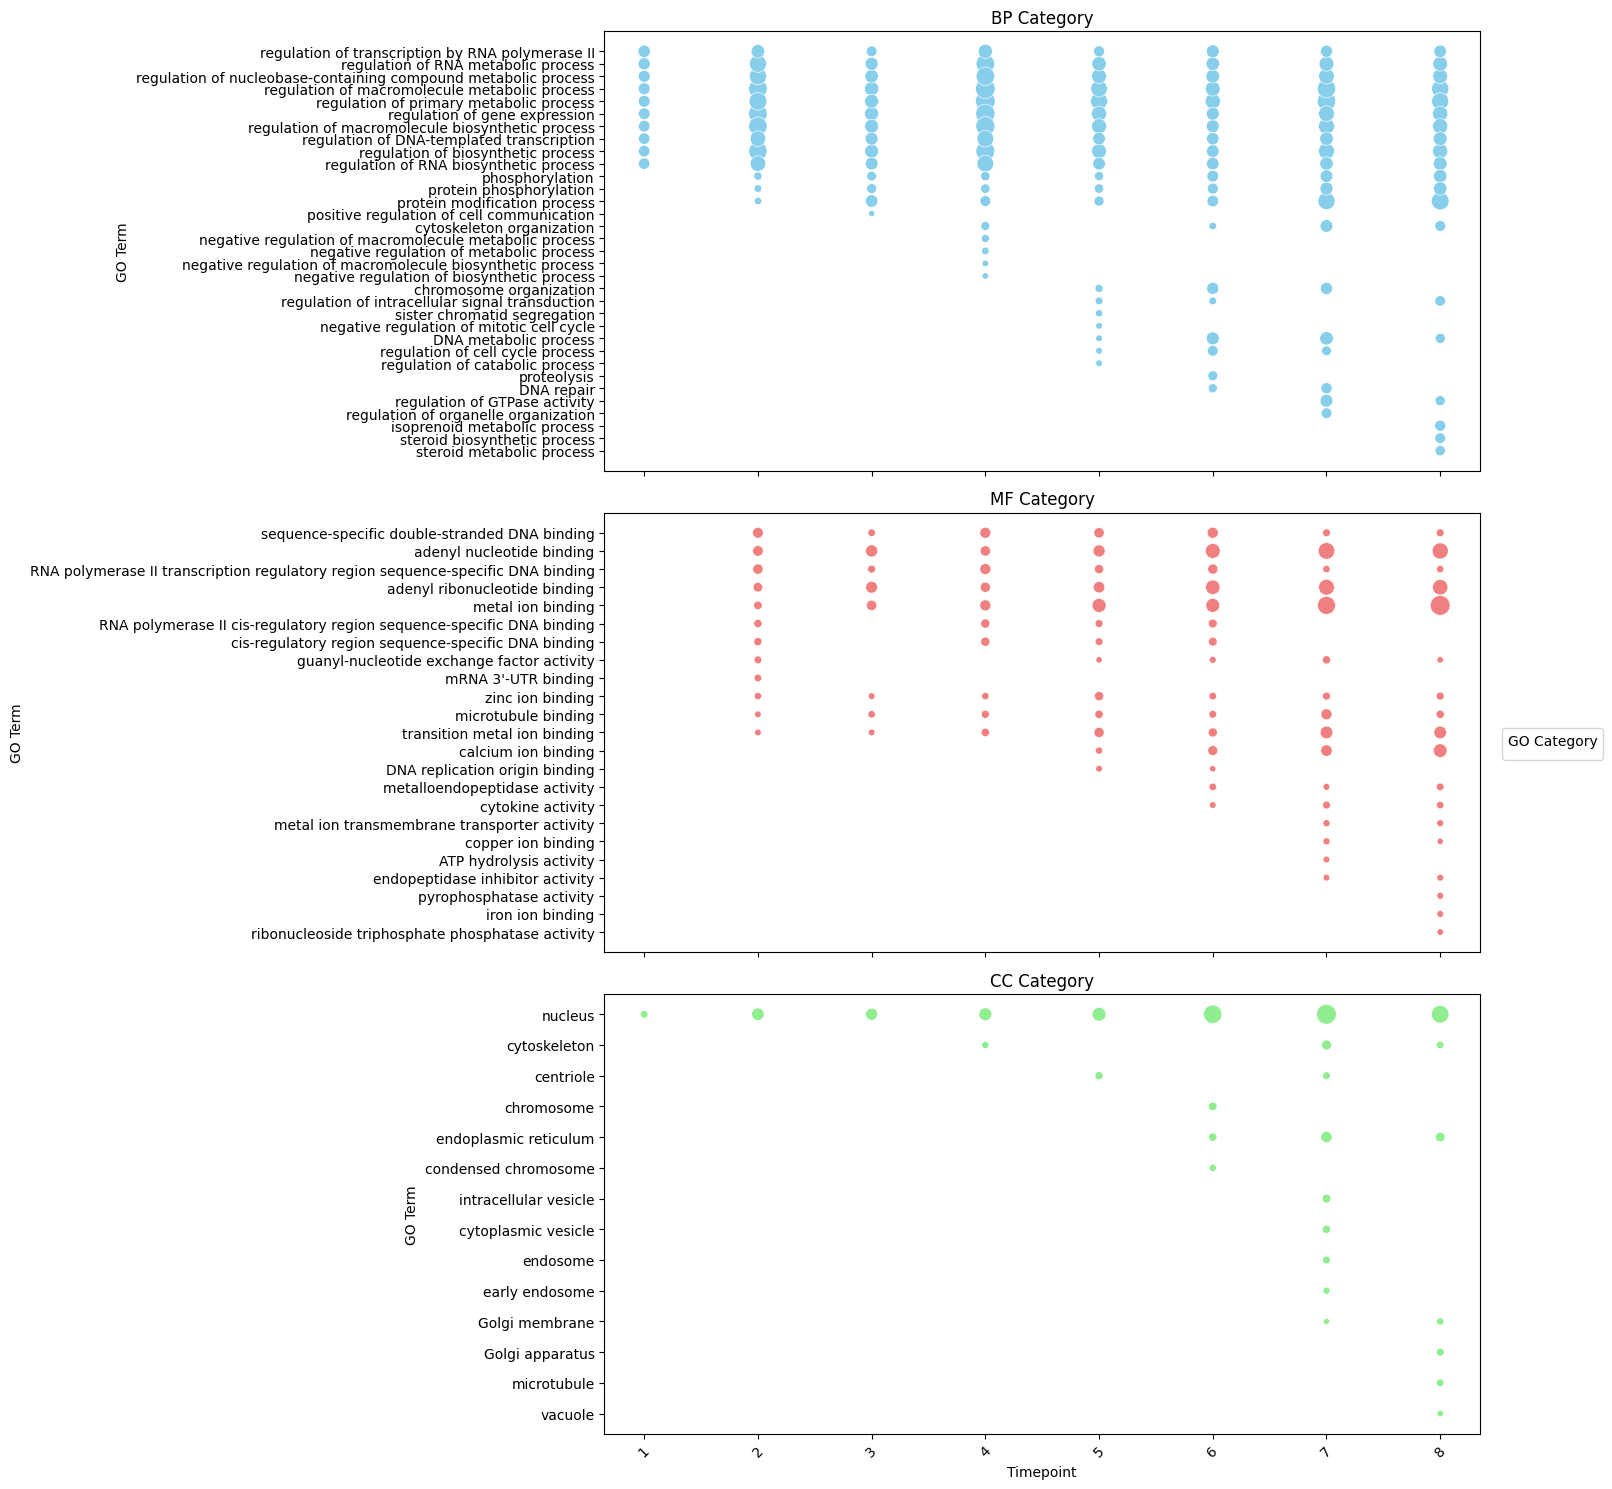

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for GO terms deeper than level 5
filtered_sig_GOs_df = sig_GOs_df[sig_GOs_df['level'] > 4]
# Aggregate results
top_n = 20  # Number of top terms to display per timepoint and category
aggregated_results = []

for timepoint in filtered_sig_GOs_df['timepoint'].unique():
    for go_cat in filtered_sig_GOs_df['go_cat'].unique():
        subset = filtered_sig_GOs_df[(filtered_sig_GOs_df['timepoint'] == timepoint) & (filtered_sig_GOs_df['go_cat'] == go_cat)]
        
        # Sort by enrichment (e.g., ratio_in_study) and significance (e.g., p_bonferroni)
        subset = subset.sort_values(by=['p_bonferroni', 'ratio_in_study'], ascending=[True, False]).head(top_n)
        aggregated_results.append(subset)

# Concatenate results and drop duplicate labels
aggregated_results_df = pd.concat(aggregated_results)

# Create a color map for GO categories
category_colors = {'BP': 'skyblue', 'MF': 'lightcoral', 'CC': 'lightgreen'}

# Map GO categories to colors
aggregated_results_df['color'] = aggregated_results_df['go_cat'].map(category_colors)

# Determine the number of unique GO categories
num_categories = aggregated_results_df['go_cat'].nunique()

# Create subplots with dynamic height based on the number of categories
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 5 * num_categories), sharex=True)

# Plot each GO category in a separate subplot
for ax, go_cat in zip(axes, ['BP', 'MF', 'CC']):
    subset = aggregated_results_df[aggregated_results_df['go_cat'] == go_cat]
    sns.scatterplot(
        data=subset,
        x='timepoint',
        y='name',  # Or 'id' if you prefer GO IDs
        hue='go_cat',
        palette=category_colors,
        size=-np.log10(subset['p_bonferroni']),  # Size by significance
        sizes=(20, 200),  # Adjust size range as needed
        legend=False,
        ax=ax
    )
    ax.set_title(f"{go_cat} Category")
    ax.set_xlabel("Timepoint")
    ax.set_ylabel("GO Term")
    ax.tick_params(axis='x', rotation=45)

# Adjust the layout
fig.tight_layout()

# Add legend outside of the plot
fig.legend(title="GO Category", bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()